# Задачи классификации и регрессии

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
#библиотека для интерактивных графиков
import ipywidgets as widgets
#библиотека для работы с векторами и матрицами
import numpy as np
#библиотека для отрисовки графиков
import matplotlib.pyplot as plt
%matplotlib inline

# Бинарная классификация

Есть объекты двух типов. Пометим их 1 и 0. Хотим для новых объектов понять, к какому типу они принадлежат 

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [3]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                       random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

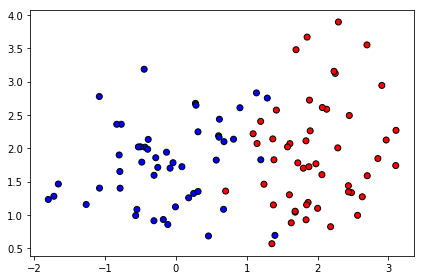

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
           edgecolors='k')

plt.tight_layout()
plt.show()

Попробуем найти уравнение прямой y=kx+b, для которой мы скажем, что если точка лежит выше прямой, то это объект класса 1(синие), а если ниже, то объект класса 0 (красные) 

In [5]:
#train часть - та часть данных, по которой мы пытаемся восстановить зависимость
#test часть - та, на которой мы пытаемся проверить, насколько точно сделали прогноз
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

In [6]:
def plot_func(k,b):

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))


    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')

    x = np.linspace(-0.5, 3)
    y = x * k+b
    plt.xlim([-0.6,3.1])
    plt.ylim([0.6,4])
    plt.plot(x, y)

    plt.tight_layout()
    plt.show()

In [7]:
interact(plot_func, k = widgets.FloatSlider(value=2,
                                               min=0,
                                               max=2.5,
                                               step=0.05),
        b = widgets.FloatSlider(value=2,
                                               min=-0.5,
                                               max=0.8,
                                               step=0.1))

interactive(children=(FloatSlider(value=2.0, description='k', max=2.5, step=0.05), FloatSlider(value=0.8, description='b', max=0.8, min=-0.5), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_func>

k = 2.4
b = -0.2

На данных, на которых мы не обучались качество должно быть не сильно хуже 

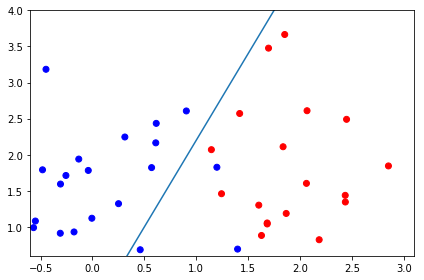

In [8]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright)

x = np.linspace(-0.5, 3)
y = x * 2.4-0.2
plt.xlim([-0.6,3.1])
plt.ylim([0.6,4])
plt.plot(x, y)

plt.tight_layout()
plt.show()

# Задача регрессии 

In [9]:
import pandas as pd

In [10]:
wh  = pd.read_csv(r'data/salary.csv')

In [11]:
X_train, X_test, y_train, y_test = \
    train_test_split(wh.YearsExperience,  wh.Salary, test_size=.3, random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
def plot_func(k,b):

    plt.scatter(wh.YearsExperience, wh.Salary)
    
    x = np.linspace(1, 11)
    y = x * k+b
    y_pred = X_train*k+b
    print('Ошибка:', round(sqrt(mean_squared_error(y_pred, y_train))))
    plt.xlim([0,12])
    plt.ylim([25000,120000])
    plt.plot(x, y,color='black')

    plt.tight_layout()
    plt.show()

In [14]:
interact(plot_func, k = widgets.FloatSlider(value=2,
                                               min=0,
                                               max=10000,
                                               step=100),
        b = widgets.FloatSlider(value=2,
                                               min=26000,
                                               max=100000,
                                               step=1000))

interactive(children=(FloatSlider(value=2.0, description='k', max=10000.0, step=100.0), FloatSlider(value=26000.0, description='b', max=100000.0, min=26000.0, step=1000.0), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_func>

k=9400
b=29000

Попробуем сделать это с помощью библиотеки, реализованной в Питоне

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Создаем объект для линейной регрессмм
regr = linear_model.LinearRegression()

# Обучаем на обучающем датасете
regr.fit(X_train.reshape(-1, 1), y_train)

# Предсказываем на тестовом
y_pred = regr.predict(X_test.reshape(-1, 1))

print('Коэффициент k: \n', (regr.coef_))
print('Kоэффициент b', round(regr.intercept_))
print("Ошибка: %.2f"
      % mean_squared_error(y_test, y_pred))



Коэффициент k: 
 [9339.08172382]
Kоэффициент b 25918.0
Ошибка: 37784662.47


C:\Users\ekaterina.semichasno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\Users\ekaterina.semichasno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


# Самостоятельная задача

In [17]:
# Загрузим датасет
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Поедлим датасет на тренировочный и тестовоый
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Поделим целевую переменную на тренировочную и тестовую
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


In [ ]:
# Создайте объект для линейной регрессии


In [ ]:
# Обучите модель


In [ ]:
# Сделайте предсказание на тестовых данных


In [ ]:
print('Коэффициент k: \n', regr.coef_)
print('Kоэффициент b', round(regr.intercept_))

print("Ошибка: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))


In [ ]:

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Документация sk_learn, например, по классификаторым:
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html